In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


In [2]:
import dfconverter

df1 = pd.read_csv("277data.csv")
df2 = pd.read_csv("311data.csv")
df3 = pd.read_csv("361data.csv")
df4 = pd.read_csv("374data.csv")

df1 = dfconverter.converter(df1)
df2 = dfconverter.converter(df2)
df3 = dfconverter.converter(df3)
df4 = dfconverter.converter(df4)

display(df1)
display(df2)
display(df3)
display(df4)


/Users/engineer_1/co2/dfconverter.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_time"][i] = df["_time"][i].replace(tzinfo=None)
/Users/engineer_1/co2/dfconverter.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"][i] = room[id_to_num[df["_measurement"][i]]][
/Users/engineer_1/co2/dfconverter.py:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["y"][i] = 0
/Users/engineer_1/co2/dfconverter.py:188: SettingWithCo

,_time,co2,humidity,temperature,day_name,y
0,2023-12-06 15:07:23.614683,614.0,23.8,27.9,Wednesday,0.3
1,2023-12-06 15:07:54.225052,614.0,23.8,27.9,Wednesday,0.3
2,2023-12-06 15:08:24.766521,615.0,23.8,27.9,Wednesday,0.3
3,2023-12-06 15:08:55.365337,615.0,23.8,27.9,Wednesday,0.3
4,2023-12-06 15:09:34.970622,616.0,23.8,27.9,Wednesday,0.3
...,...,...,...,...,...,...
22478,2023-12-14 15:04:40.092547,788.0,23.1,27.2,Thursday,1
22479,2023-12-14 15:05:10.582096,788.0,23.1,27.2,Thursday,1
22480,2023-12-14 15:05:41.360208,789.0,23.1,27.2,Thursday,1
22481,2023-12-14 15:06:20.337206,788.0,23.1,27.2,Thursday,1


,_time,co2,humidity,temperature,day_name,y
0,2023-12-06 15:07:11.422564,790.0,28.6,27.8,Wednesday,1
1,2023-12-06 15:07:43.766558,792.0,28.6,27.8,Wednesday,1
2,2023-12-06 15:08:16.081131,794.0,28.6,27.8,Wednesday,1
3,2023-12-06 15:08:48.423390,793.0,28.6,27.8,Wednesday,1
4,2023-12-06 15:09:21.103568,794.0,28.6,27.8,Wednesday,1
...,...,...,...,...,...,...
21327,2023-12-14 15:04:32.648509,614.0,24.4,27.3,Thursday,0
21328,2023-12-14 15:05:06.200674,615.0,24.4,27.3,Thursday,0
21329,2023-12-14 15:05:37.537477,615.0,24.4,27.3,Thursday,0
21330,2023-12-14 15:06:09.666981,614.0,24.4,27.3,Thursday,0


,_time,co2,humidity,temperature,day_name,y
0,2023-12-06 15:07:30.662170,536.0,29.2,25.6,Wednesday,0
1,2023-12-06 15:08:02.496970,536.0,29.2,25.6,Wednesday,0
2,2023-12-06 15:08:34.357569,537.0,29.1,25.6,Wednesday,0
3,2023-12-06 15:09:06.255806,538.0,29.2,25.6,Wednesday,0
4,2023-12-06 15:09:38.034275,538.0,29.1,25.6,Wednesday,0
...,...,...,...,...,...,...
19033,2023-12-14 15:04:41.745587,582.0,25.7,25.7,Thursday,0
19034,2023-12-14 15:05:13.590879,583.0,25.7,25.7,Thursday,0
19035,2023-12-14 15:05:45.432829,585.0,25.7,25.7,Thursday,0
19036,2023-12-14 15:06:17.267514,584.0,25.8,25.7,Thursday,0


,_time,co2,humidity,temperature,day_name,y
0,2023-12-06 15:07:32.330190,894.0,29.1,28.0,Wednesday,1
1,2023-12-06 15:08:05.609667,895.0,29.0,28.0,Wednesday,1
2,2023-12-06 15:08:38.478687,896.0,29.1,28.0,Wednesday,1
3,2023-12-06 15:09:11.616283,897.0,29.0,28.0,Wednesday,1
4,2023-12-06 15:09:44.720205,896.0,29.0,28.0,Wednesday,1
...,...,...,...,...,...,...
16282,2023-12-14 15:04:44.877115,533.0,23.8,26.1,Thursday,1
16283,2023-12-14 15:05:16.126563,534.0,23.8,26.1,Thursday,1
16284,2023-12-14 15:05:49.298089,534.0,23.8,26.1,Thursday,1
16285,2023-12-14 15:06:22.384309,534.0,23.8,26.1,Thursday,1


In [3]:
train_df = pd.concat([df1, df2, df3, df4])
train_df


,_time,co2,humidity,temperature,day_name,y
0,2023-12-06 15:07:23.614683,614.0,23.8,27.9,Wednesday,0.3
1,2023-12-06 15:07:54.225052,614.0,23.8,27.9,Wednesday,0.3
2,2023-12-06 15:08:24.766521,615.0,23.8,27.9,Wednesday,0.3
3,2023-12-06 15:08:55.365337,615.0,23.8,27.9,Wednesday,0.3
4,2023-12-06 15:09:34.970622,616.0,23.8,27.9,Wednesday,0.3
...,...,...,...,...,...,...
16282,2023-12-14 15:04:44.877115,533.0,23.8,26.1,Thursday,1
16283,2023-12-14 15:05:16.126563,534.0,23.8,26.1,Thursday,1
16284,2023-12-14 15:05:49.298089,534.0,23.8,26.1,Thursday,1
16285,2023-12-14 15:06:22.384309,534.0,23.8,26.1,Thursday,1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 時間帯と目的変数の関係
plt.figure(figsize=(10, 6))
sns.boxplot(x="_time", y="y", data=train_df)
plt.title("Relationship between hour and y")
plt.show()

# 曜日と目的変数の関係
plt.figure(figsize=(10, 6))
sns.boxplot(x="day_name", y="y", data=train_df)
plt.title("Relationship between day of week and y")
plt.show()


In [21]:
test_df = pd.read_csv("test_data.csv")
test_df = test_df.drop(columns=["Unnamed: 0"])
test_df


,co2,humidity,temperature,seat_num,y
0,502.0,17.1,25.5,80,0.0
1,501.0,17.0,25.5,80,0.0
2,502.0,17.1,25.5,80,0.0
3,503.0,17.1,25.5,80,0.0
4,505.0,17.1,25.5,80,0.0
...,...,...,...,...,...
14889,558.0,21.9,25.1,56,0.0
14890,559.0,21.9,25.1,56,0.0
14891,559.0,21.9,25.1,56,0.0
14892,558.0,21.9,25.1,56,0.0


In [22]:
df = pd.read_csv("alldata2.csv")
df = df.drop(columns=["Unnamed: 0"])
df


,co2,humidity,temperature,seat_num,y
0,536.0,29.2,25.6,56,0.0
1,536.0,29.2,25.6,56,0.0
2,537.0,29.1,25.6,56,0.0
3,538.0,29.2,25.6,56,0.0
4,538.0,29.1,25.6,56,0.0
...,...,...,...,...,...
29110,788.0,23.1,27.2,80,1.0
29111,788.0,23.1,27.2,80,1.0
29112,789.0,23.1,27.2,80,1.0
29113,788.0,23.1,27.2,80,1.0


In [23]:
print(df.describe())
print(test_df.describe())


                co2      humidity   temperature      seat_num             y
count  29115.000000  29115.000000  29115.000000  29115.000000  29115.000000
mean     750.071303     30.373639     26.523442     97.991654      0.293460
std      189.054221      6.509636      1.070558     53.437074      0.431968
min      465.000000     19.200000     23.400000     56.000000      0.000000
25%      596.000000     25.400000     25.900000     56.000000      0.000000
50%      705.000000     29.000000     26.600000     80.000000      0.000000
75%      874.000000     34.800000     27.400000    183.000000      1.000000
max     2100.000000     46.400000     29.000000    183.000000      1.000000
                co2      humidity   temperature      seat_num             y
count  14894.000000  14894.000000  14894.000000  14894.000000  14894.000000
mean     733.877669     19.676205     26.228750     94.496442      0.363462
std      198.804686      3.952015      1.083384     52.404069      0.451683
min      485

In [9]:
df["co2_temperature_ratio"] = df["co2"] / df["temperature"]
df["co2_temperature_product"] = df["co2"] * df["temperature"]


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29115 entries, 0 to 29114
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   co2          29115 non-null  float64
 1   humidity     29115 non-null  float64
 2   temperature  29115 non-null  float64
 3   seat_num     29115 non-null  int64  
 4   y            29115 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.1 MB


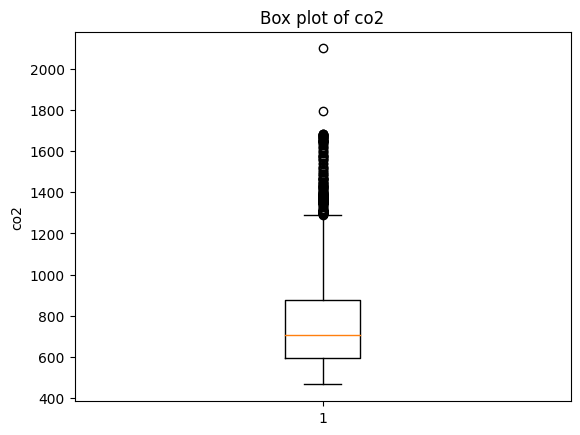

In [25]:
import matplotlib.pyplot as plt

# 箱ひげ図の描画
plt.boxplot(df["co2"])
plt.title("Box plot of co2")
plt.ylabel("co2")
plt.show()


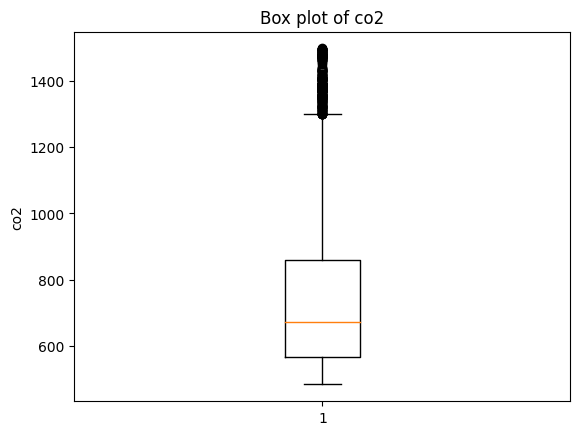

In [26]:
# 箱ひげ図の描画
plt.boxplot(test_df["co2"])
plt.title("Box plot of co2")
plt.ylabel("co2")
plt.show()


In [17]:
import pickle

# モデルを読み込む
with open("classroom_predict_model.pkl", "rb") as f:
    bmodel = pickle.load(f)


In [27]:
# co2の値が1500を超えるレコードを削除
df = df[df["co2"] <= 1500]


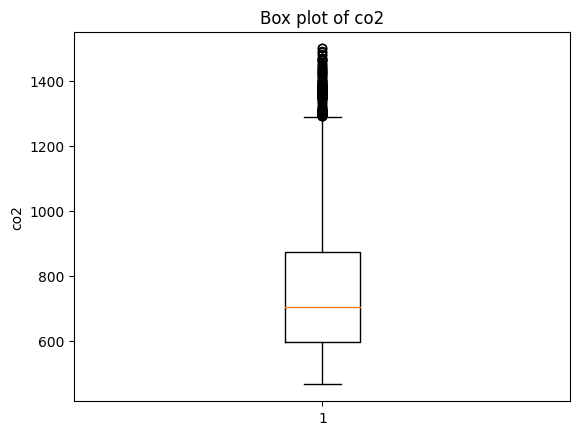

In [28]:
# 箱ひげ図の描画
plt.boxplot(df["co2"])
plt.title("Box plot of co2")
plt.ylabel("co2")
plt.show()


In [34]:
df


,co2,humidity,temperature,seat_num,y
0,536.0,29.2,25.6,56,0.0
1,536.0,29.2,25.6,56,0.0
2,537.0,29.1,25.6,56,0.0
3,538.0,29.2,25.6,56,0.0
4,538.0,29.1,25.6,56,0.0
...,...,...,...,...,...
29110,788.0,23.1,27.2,80,1.0
29111,788.0,23.1,27.2,80,1.0
29112,789.0,23.1,27.2,80,1.0
29113,788.0,23.1,27.2,80,1.0


訓練データに対して交差検証

In [36]:
import numpy as np
import optuna

# from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
)

# データと目的変数
X = df[["co2", "humidity", "temperature"]]
y = df["y"]
# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.values


# 目的関数の定義
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_float("max_features", 0.1, 1.0),
        "bootstrap": False,
        "n_jobs": -1,
    }

    model = ExtraTreesRegressor(**params)
    # 交差検証で複数の評価指標を計算
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    # rmse_scores = []
    r2_scores = []
    # mae_scores = []
    # rmsle_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        # rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        # mae = mean_absolute_error(y_val, y_pred)
        # rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

        # rmse_scores.append(rmse)
        r2_scores.append(r2)
        # mae_scores.append(mae)
        # rmsle_scores.append(rmsle)

    trial.set_user_attr("best_model", model)
    # 複数の評価指標を返す
    # return np.mean(rmse_scores), np.mean(r2_scores), np.mean(mae_scores), np.mean(rmsle_scores)
    return np.mean(r2_scores)


# Optunaでの最適化
# sampler = optuna.samplers.NSGAIISampler(seed=123)
study = optuna.create_study(
    # sampler=sampler, directions=["minimize", "maximize", "minimize", "minimize"]
    direction="maximize"
)
study.optimize(objective, n_trials=100)

print(study.best_params)
print(study.best_value)
# 各目的に対する最良の試行を表示
# for trial in study.best_trials:
#     print(trial.values)
#     print(trial.params)


[I 2024-01-04 15:43:56,901] A new study created in memory with name: no-name-0abc905f-1866-45da-9cbe-2d14ea323c8b
[I 2024-01-04 15:43:59,665] Trial 0 finished with value: 0.7653225142480786 and parameters: {'n_estimators': 601, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 0.30378810300243064}. Best is trial 0 with value: 0.7653225142480786.
[I 2024-01-04 15:44:01,955] Trial 1 finished with value: 0.5157335249681001 and parameters: {'n_estimators': 654, 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 0.1026820713797622}. Best is trial 0 with value: 0.7653225142480786.
[I 2024-01-04 15:44:02,472] Trial 2 finished with value: 0.10466400518156496 and parameters: {'n_estimators': 149, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.4168221174992145}. Best is trial 0 with value: 0.7653225142480786.
[I 2024-01-04 15:44:03,158] Trial 3 finished with value: 0.7159293158381403 and parameters: {'n

{'n_estimators': 785, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.9068759224343895}
0.9685488253747161


訓練データを交差検証+検証データoptuna

In [40]:
test_X = test_df[["co2", "humidity", "temperature"]]

# 実際のyの値
actual_y = test_df["y"]

scaler = StandardScaler()

test_X = scaler.fit_transform(test_X)

# 最良の試行のリストを取得
best_trials = study.best_trials

# 各目的に対する最良の試行を表示
for trial in best_trials:
    print(trial.values)
    print(trial.params)

    # 最良の試行からモデルを取得
    best_model = trial.user_attrs["best_model"]

    # このモデルを使用して予測を行う
    predicted_y = best_model.predict(test_X)

    # 評価指標の計算
    rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
    r2 = r2_score(actual_y, predicted_y)
    mae = mean_absolute_error(actual_y, predicted_y)
    rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

    print("RMSE: ", rmse)
    print("R2: ", r2)
    print("MAE: ", mae)
    print("RMSLE: ", rmsle)


[0.9685488253747161]
{'n_estimators': 785, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.9068759224343895}
RMSE:  0.6176940881277995
R2:  -0.9709915560655273
MAE:  0.5705682320625499
RMSLE:  0.45341943692771375


/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [11]:
import numpy as np
import optuna

# from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
)

X = df[
    [
        "co2",
        "humidity",
        "temperature",
        "co2_temperature_ratio",
        "co2_temperature_product",
    ]
]
y = df["y"]

test_df["co2_temperature_ratio"] = test_df["co2"] / test_df["temperature"]
test_df["co2_temperature_product"] = test_df["co2"] * test_df["temperature"]
test_X = test_df[
    [
        "co2",
        "humidity",
        "temperature",
        "co2_temperature_ratio",
        "co2_temperature_product",
    ]
]
test_y = test_df[["y"]]


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_float("max_features", 0.1, 1.0),
        "bootstrap": False,
        "n_jobs": -1,
    }

    model = ExtraTreesRegressor(**params)
    # 交差検証で複数の評価指標を計算
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    rmse_scores = []
    r2_scores = []
    # mae_scores = []
    # rmsle_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

        rmse_scores.append(rmse)
        r2_scores.append(r2)
        # mae_scores.append(mae)
        # rmsle_scores.append(rmsle)

    predicted_y = model.predict(test_X)

    # 評価指標の計算
    rmse = np.sqrt(mean_squared_error(test_y, predicted_y))
    r2 = r2_score(test_y, predicted_y)
    # mae = mean_absolute_error(test_y, predicted_y)
    # rmsle = np.sqrt(mean_squared_log_error(test_y, predicted_y))

    # print("RMSE: ", rmse, "R2: ", r2, "MAE: ", mae, "RMSLE: ", rmsle)

    trial.set_user_attr("best_model", model)
    # 複数の評価指標を返す
    return rmse, r2, np.mean(rmse_scores), np.mean(r2_scores)


# Optunaでの最適化
sampler = optuna.samplers.NSGAIISampler(seed=123)
study = optuna.create_study(
    sampler=sampler, directions=["minimize", "maximize", "minimize", "maximize"]
)
study.optimize(objective, n_trials=100)

# 各目的に対する最良の試行を表示
for trial in study.best_trials:
    print(trial.values)
    print(trial.params)

# optna.visualization.plot_param_importances(study)


[I 2024-01-04 08:49:07,420] A new study created in memory with name: no-name-6b92a8f6-50a3-497f-a43b-a7119c1312fc
[I 2024-01-04 08:49:10,054] Trial 0 finished with values: [0.4333305841689209, 0.079550525726649, 0.31328830982110417, 0.4738136257797681] and parameters: {'n_estimators': 588, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.7475220728070068}. 
[I 2024-01-04 08:49:11,916] Trial 1 finished with values: [0.4514053058938144, 0.0011630761849170668, 0.16283874346862542, 0.8577647402427843] and parameters: {'n_estimators': 396, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.45290576637473545}. 
[I 2024-01-04 08:49:13,607] Trial 2 finished with values: [0.46410230313209994, -0.05581716099940803, 0.16027657629878939, 0.86226694272482] and parameters: {'n_estimators': 340, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.4582398297973883}. 
[I 2024-01-04 08:49:15,564] Trial 3 finishe

[0.4514053058938144, 0.0011630761849170668, 0.16283874346862542, 0.8577647402427843]
{'n_estimators': 396, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.45290576637473545}
[0.4287527296887941, 0.098895693110998, 0.3127358781522223, 0.47528127513669044]
{'n_estimators': 167, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 0.11451628602551515}
[0.4615566075013471, -0.044266183638576484, 0.14935407466598924, 0.8803837943566014]
{'n_estimators': 594, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.633859224905999}
[0.42354648831428104, 0.1206466144890711, 0.37759900146965675, 0.2356435630400619]
{'n_estimators': 584, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.40911041264349246}
[0.4333064785202373, 0.07965292982791461, 0.2903180605315705, 0.5478058593713448]
{'n_estimators': 459, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_feat

訓練データ+検証データに対して交差検証

In [43]:
# データと目的変数
X = train_df[["co2", "humidity", "temperature"]]
y = train_df["y"]


def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_float("max_features", 0.1, 1.0),
        "bootstrap": False,
        "n_jobs": -1,
    }

    model = ExtraTreesRegressor(**params)
    # 交差検証で複数の評価指標を計算
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    rmse_scores = []
    r2_scores = []
    mae_scores = []
    rmsle_scores = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

        rmse_scores.append(rmse)
        r2_scores.append(r2)
        mae_scores.append(mae)
        rmsle_scores.append(rmsle)

    trial.set_user_attr("best_model", model)
    # 複数の評価指標を返す
    return (
        np.mean(rmse_scores),
        np.mean(r2_scores),
        np.mean(mae_scores),
        np.mean(rmsle_scores),
    )


# Optunaでの最適化
sampler = optuna.samplers.NSGAIISampler(seed=123)
study = optuna.create_study(
    sampler=sampler, directions=["minimize", "maximize", "minimize", "minimize"]
)
study.optimize(objective, n_trials=100)

# 各目的に対する最良の試行を表示
for trial in study.best_trials:
    print(trial.values)
    print(trial.params)

optuna.visualization.plot_param_importances(study)

# 最良の試行のリストを取得
best_trials = study.best_trials
best_models3 = []
# 各目的に対する最良の試行を表示
for trial in best_trials:
    print(trial.values)
    print(trial.params)

    # 最良の試行からモデルを取得
    best_models3 = trial.user_attrs["best_model"]


[I 2024-01-03 12:26:41,776] A new study created in memory with name: no-name-3477a280-71a3-4e89-812d-40a5767b038a
[I 2024-01-03 12:26:44,337] Trial 0 finished with values: [0.33462586386090093, 0.42149120688997527, 0.27863479762982524, 0.23418542382985014] and parameters: {'n_estimators': 588, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 0.7475220728070068}. 
[I 2024-01-03 12:26:45,995] Trial 1 finished with values: [0.24885841028158678, 0.6793811991591345, 0.21096539651857812, 0.1725322656030382] and parameters: {'n_estimators': 396, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 0.45290576637473545}. 
[I 2024-01-03 12:26:47,842] Trial 2 finished with values: [0.19300832364238385, 0.8075323451629342, 0.1409366666575777, 0.13395173651394715] and parameters: {'n_estimators': 340, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.4582398297973883}. 
[I 2024-01-03 12:26:49,860] Trial 3 finis

[0.11821284827072716, 0.9277948149704258, 0.072678298669614, 0.08229014731227521]
{'n_estimators': 340, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.4582398297973883}
[0.11821284827072716, 0.9277948149704258, 0.072678298669614, 0.08229014731227521]
{'n_estimators': 340, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.4582398297973883}


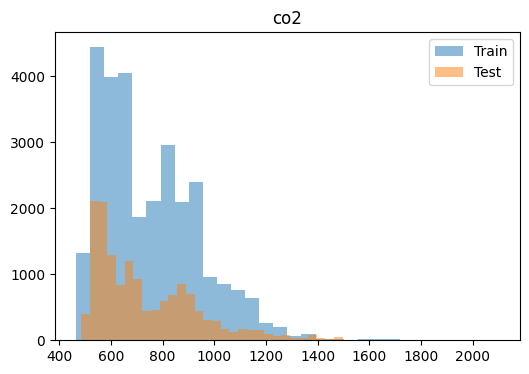

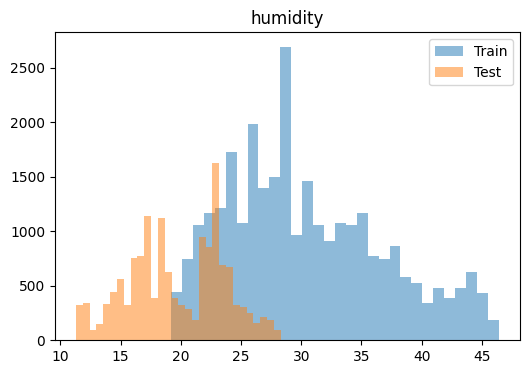

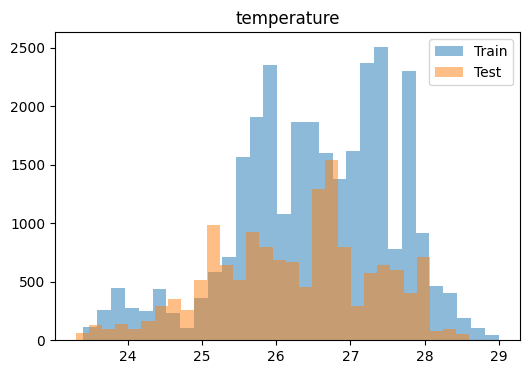

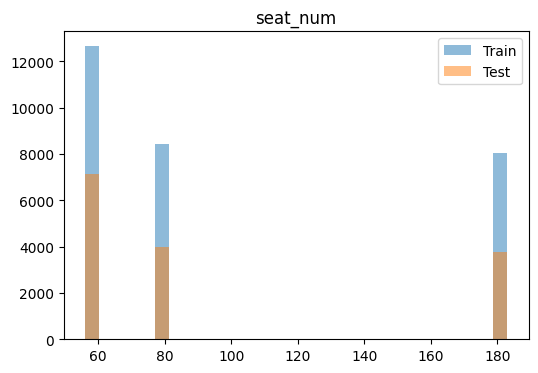

In [49]:
import matplotlib.pyplot as plt

# 訓練データとテストデータの各特徴量のヒストグラムを描く
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[column], bins=30, alpha=0.5, label="Train")
    plt.hist(test_df[column], bins=30, alpha=0.5, label="Test")
    plt.title(column)
    plt.legend()
    plt.show()


In [46]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
)

rmodel = pd.read_pickle("pycaretmodel.pkl")

test_X = test_df[["co2", "humidity", "temperature", "seat_num"]]
actual_y = test_df["y"]

predicted_y = rmodel.predict(test_X)

# 評価指標の計算
rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
r2 = r2_score(actual_y, predicted_y)
mae = mean_absolute_error(actual_y, predicted_y)
rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)
print("RMSLE: ", rmsle)


RMSE:  0.4863128882995672
R2:  -0.15929197146862517
MAE:  0.37799420762942026
RMSLE:  0.33753221353609614


In [13]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_squared_log_error,
)
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# test_dfの特徴量で予測
test_X = test_df[
    [
        "co2",
        "humidity",
        "temperature",
        "co2_temperature_ratio",
        "co2_temperature_product",
    ]
]

# 実際のyの値
actual_y = test_df["y"]

# 最良の試行のリストを取得
best_trials = study.best_trials

# 各目的に対する最良の試行を表示
for trial in best_trials:
    print(trial.values)
    print(trial.params)

    # 最良の試行からモデルを取得
    best_model = trial.user_attrs["best_model"]

    # このモデルを使用して予測を行う
    predicted_y = best_model.predict(test_X)

    # 評価指標の計算
    rmse = np.sqrt(mean_squared_error(actual_y, predicted_y))
    r2 = r2_score(actual_y, predicted_y)
    mae = mean_absolute_error(actual_y, predicted_y)
    rmsle = np.sqrt(mean_squared_log_error(actual_y, predicted_y))

    print("RMSE: ", rmse)
    print("R2: ", r2)
    print("MAE: ", mae)
    print("RMSLE: ", rmsle)


[0.11420956150844327, 0.9300248247326955, 0.05927958250794054, 0.07937458852335603]
{'n_estimators': 323, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 0.9326192406525875}
RMSE:  0.47708170449747855
R2:  -0.11569835770050885
MAE:  0.3856705204940902
RMSLE:  0.33005859939176563


In [13]:
optuna.visualization.plot_contour(study, params=["param1", "param2"])


ValueError: If the `study` is being used for multi-objective optimization, please specify the `target`.

In [10]:
# 最適なパラメータの表示
print("Best parameters: ", study.best_params)

# 最良の評価値の表示（RMSE）
print("Best score (RMSE): ", study.best_value)


RuntimeError: A single best trial cannot be retrieved from a multi-objective study. Consider using Study.best_trials to retrieve a list containing the best trials.

In [3]:
best_trials = study.best_trials

# 各目的に対する最良の試行を表示
for trial in best_trials:
    print(trial.values)
    print(trial.params)


[0.43196697254388977, -0.0003271874731902269, 0.3047539520245233, 0.3792785646356883]
{'n_estimators': 28, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.4111519073618627, 'max_features': 'sqrt', 'max_leaf_nodes': 66, 'min_impurity_decrease': 0.3517033529777046, 'bootstrap': True, 'warm_start': False, 'ccp_alpha': 0.9097146620433381}
[0.43197106185863665, -0.00034579189282823997, 0.30470783111592, 0.3791633495942429]
{'n_estimators': 53, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1614869714012131, 'max_features': 'sqrt', 'max_leaf_nodes': 34, 'min_impurity_decrease': 0.05209113438949886, 'bootstrap': True, 'warm_start': False, 'ccp_alpha': 0.18380737200776398}
[0.43196783638695135, -0.0003309624045220616, 0.3047116527515571, 0.3791773072312788]
{'n_estimators': 16, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.1614869714012131, 'max_features':

In [8]:
study.best_params


{'n_estimators': 10,
 'max_depth': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.2705013119854998,
 'bootstrap': True,
 'ccp_alpha': 0.2811844535589042}

In [9]:
study.best_trial.params


{'n_estimators': 10,
 'max_depth': 20,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_features': 'log2',
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.2705013119854998,
 'bootstrap': True,
 'ccp_alpha': 0.2811844535589042}

In [5]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor

# データと目的変数
X = df[["co2", "humidity", "temperature", "seat_num"]]
y = df["y"]


# 目的関数の定義
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical(
            "max_features", ["auto", "sqrt", "log2"]
        ),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 2, 100),
        "min_impurity_decrease": trial.suggest_float("min_impurity_decrease", 0.0, 1.0),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "ccp_alpha": trial.suggest_float("ccp_alpha", 0.0, 1.0),
    }

    model = ExtraTreesRegressor(**params)

    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error").mean()
    return score


# Optunaでの最適化
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# 最適なパラメータの表示
print(study.best_params)


/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-12-21 00:38:22,980] A new study created in memory with name: no-name-0b1963bd-841b-469e-bb8b-0f4316a610ba
[I 2023-12-21 00:38:23,136] Trial 0 finished with value: -0.19475387334739871 and parameters: {'n_estimators': 37, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_leaf_nodes': 82, 'min_impurity_decrease': 0.058810372026473434, 'bootstrap': True, 'ccp_alpha': 0.4382647418554785}. Best is trial 0 with value: -0.19475387334739871.
[W 2023-12-21 00:38:23,144] Trial 1 failed with parameters: {'n_estimators': 279, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_leaf_nodes': 77, 'min_impurity_decrease': 0.6518349526884617, 'bootstrap'

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/Users/engineer_1/co2/co2venv/lib/python3.11/site-packages/sklearn/utils/_param_validation.py", line 96, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of ExtraTreesRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [7]:
study.best_trial.value


-0.194688273915869

In [10]:
import pickle
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(**best_params)
model.fit(X, y)

# モデルを保存
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
# モデルのパラメータを表示
for param, value in model.get_params().items():
    print(f"{param}: {value}")


In [11]:
model


ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.5211559291065112, max_depth=20,
                    max_features='sqrt', max_leaf_nodes=29,
                    min_impurity_decrease=0.7745812008118621,
                    min_samples_leaf=7, min_samples_split=4, n_estimators=10)